![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, f1_score,mean_squared_error
from sklearn.ensemble import BaggingClassifier, VotingClassifier
import statsmodels.api as sm

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Se extrae el index como columna
bikes.reset_index(inplace=True)

# Visualización de los datos
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [4]:
# Se revisan los tipos de datos que tiene el Dataframe
bikes.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
total                  int64
hour                   int64
dtype: object

In [5]:
# Se revisan las estadisticas del set de datos
bikes.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [6]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [7]:
# Descripción de la variable de respuesta 'season'
bikes.season.describe()

count    10886.000000
mean         2.506614
std          1.116174
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: season, dtype: float64

In [8]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [9]:
# Descripción de la variable de respuesta 'hour'
bikes.hour.describe()

count    10886.000000
mean        11.541613
std          6.915838
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64

El conjunto de datos proporciona información sobre una serie de variables relacionadas con el alquiler de bicicletas.En este punto, se presenta información sobre la temporada del año (season) y la hora del día (hour) en que se alquilaron las bicicletas.

La variable season tiene un rango de valores entre 1 y 4, donde 1 representa la temporada de primavera, 2 la verano, 3 el otoño y 4 el invierno. La media de la variable season es 2.51, con una desviación estándar de 1.12, lo que indica que hay una variabilidad significativa en la distribución de los datos. Los valores mínimo y máximo son 1 y 4, respectivamente. El 50% de los datos se encuentran entre las temporadas 2 y 3, mientras que el 25% de los datos se encuentran en la temporada 1 y el 25% restante se encuentra en la temporada 4.

La variable hour representa la hora del día en que se alquilaron las bicicletas y tiene un rango de valores entre 0 y 23. La media de la variable hour es 11.54, con una desviación estándar de 6.92. Los valores mínimo y máximo son 0 y 23, respectivamente. El 50% de los datos se encuentran entre las horas 12 y 18, mientras que el 25% de los datos se encuentran entre las horas 6 y 12 y el 25% restante se encuentra entre las horas 18 y 23.

En general, la distribución de los datos sugiere que las bicicletas se alquilan con mayor frecuencia durante las horas del día entre las 12 y las 18, y que las temporadas de verano y otoño son las más populares para alquilar bicicletas. Estos resultados podrían ser útiles para los negocios de alquiler de bicicletas, ya que pueden utilizar esta información para planificar sus operaciones y promociones en función de las horas del día y las temporadas del año en que es más probable que se alquilen bicicletas.

Para la variable "season" se puede observar que la media de la temporada 3 es la mayor con 234, seguida de la temporada 2 con 215. La temporada 1 tiene la media más baja con 116, y la temporada 4 se encuentra en tercer lugar con una media de 198. Además, se puede notar que la desviación estándar es baja para todas las temporadas, indicando que la mayoría de los valores están cercanos a la media.

Para la variable "hour" se puede observar que la media de alquileres es baja en las horas tempranas de la madrugada, siendo las 4 am la hora con menos alquileres, con un promedio de 6.4. El promedio de alquileres comienza a aumentar a partir de las 5 am, y a las 6 am la media es de 76 alquileres. A partir de las 7 am, la media de alquileres por hora se incrementa drásticamente y llega a su punto máximo a las 5 pm con un promedio de 316 alquileres. Luego de las 5 pm, la media comienza a disminuir lentamente hasta las a am del día siguiente. Es interesante notar que las horas pico son a las 8 am y a las 5 pm, lo que sugiere que los alquileres son utilizados principalmente para el transporte diario al trabajo o la escuela.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

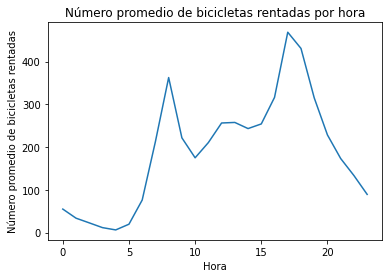

In [10]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()
plt.title('Número promedio de bicicletas rentadas por hora')
plt.xlabel('Hora')
plt.ylabel('Número promedio de bicicletas rentadas')
plt.show()

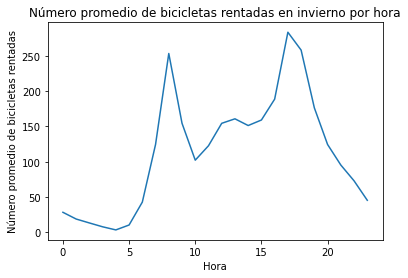

In [11]:

# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes_winter = bikes[bikes.season == 1]
bikes_winter.groupby('hour').total.mean().plot()
plt.title('Número promedio de bicicletas rentadas en invierno por hora')
plt.xlabel('Hora')
plt.ylabel('Número promedio de bicicletas rentadas')
plt.show()


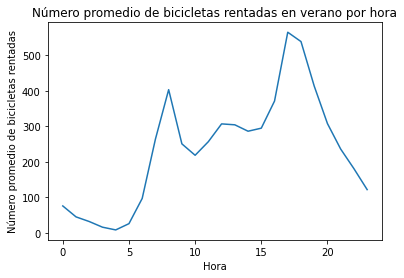

In [12]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes_summer = bikes[bikes.season == 3]
bikes_summer.groupby('hour').total.mean().plot()
plt.title('Número promedio de bicicletas rentadas en verano por hora')
plt.xlabel('Hora')
plt.ylabel('Número promedio de bicicletas rentadas')
plt.show()

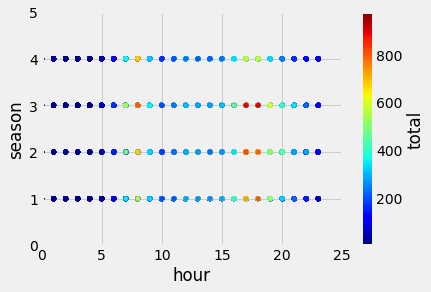

In [13]:
# Revisión de la cantidad de préstamos por hora y estación
plt.style.use('fivethirtyeight')
bikes.plot(kind='scatter', x='hour', y='season', c='total', colormap='jet', xlim=(0, 25), ylim=(0, 5))
plt.show()

En ambas gráficas se puede observar que hay un patrón bimodal, es decir, hay dos horas del día en las que se alquilan más bicicletas. 
* En invierno, las horas más populares son alrededor de las 8-9 am y alrededor de las 5-6 pm. 
* En verano, las horas más populares son alrededor de las 8-9 am y alrededor de las 5-6 pm. 

Además, se puede observar que el número promedio de bicicletas rentadas es mayor en verano en comparación con invierno en las mismas horas del día, eso puede ser ocasionado por el clima. En términos generales las dos estaciones analizadas siguen el comportamiento del total de las estaciones (primera gráfica)

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [14]:
# Celda 3
X = bikes[['season', 'hour']]
# Se transforma la variable season en numérica
X_dummies = pd.get_dummies(bikes['season'], prefix='season', drop_first=True)
X = pd.concat([X, X_dummies], axis=1)
X.drop('season', axis=1, inplace=True)
y = bikes['total']

model_rl = LinearRegression().fit(X, y)
print("Interceptos:", model_rl.intercept_)
print("Coeficientes:", list(zip(X.columns, model_rl.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", model_rl.score(X, y))

# Calcular métrica de desempeño (Error Cuadrático Medio)
y_pred_3_lr = model_rl.predict(X)
mse_3_lr = mean_squared_error(y, y_pred_3_lr)
print("Error Cuadrático Medio: ", mse_3_lr)

Interceptos: -6.430262462306786
Coeficientes: [('hour', 10.545206094069927), ('season_2', 100.31723191606622), ('season_3', 119.46754994593317), ('season_4', 84.08311787296769)]
Coeficiente de determinación R^2: 0.22339339904452493
Error Cuadrático Medio:  25480.694694371625


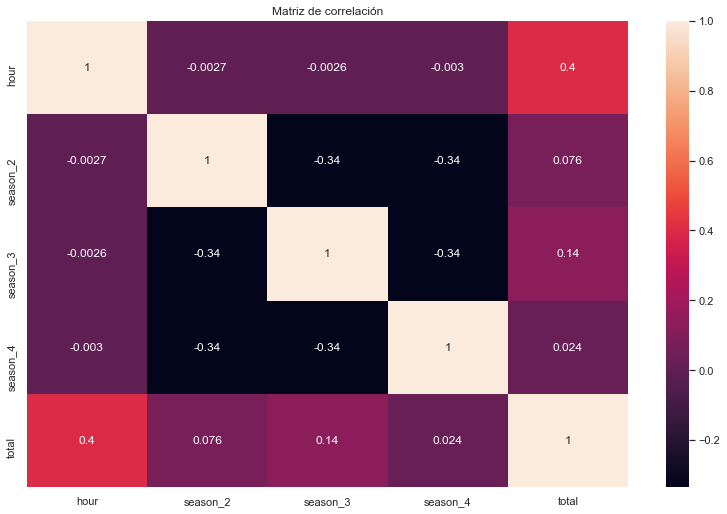

In [15]:
# Revisión de la correlación de las variables

data=pd.concat([X, y], axis=1)

correlacion = data.corr()
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(correlacion, annot = True)
plt.title("Matriz de correlación")
plt.show()

No se evidencian correlaciones altas superiores a 0.5, las que muestran una correlación mayor son hour (0.4) y season_3 (0.14). Lo que se presta para pensar que pueden tener una asociación pero no lineal.

In [16]:
# Para complementar el análisis, se realiza el modelo nuevamente pero con Statsmodels para revisar el p-value de cada uno de los coeficientes 



# Agregar constante al conjunto de datos de entrada
X_2 = sm.add_constant(X)

# Crear el modelo de regresión lineal y ajustarlo
model_lr_2 = sm.OLS(y, X_2).fit()

# Imprimir los resultados del modelo, que incluyen los valores de p
print(model_lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     782.5
Date:                Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:58:59   Log-Likelihood:                -70669.
No. Observations:               10886   AIC:                         1.413e+05
Df Residuals:                   10881   BIC:                         1.414e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.4303      4.016     -1.601      0.1

La columna 'coef' muestra los coeficientes estimados para cada una de las variables. En este caso, el intercepto es -6.4303, lo que significa que si todas las variables independientes son cero, se esperaría un valor promedio de 'total' de -6.4303 (lo cual no tiene sentido en este caso). La variable 'hour' tiene un coeficiente de 10.5452, lo que indica que por cada incremento de una hora en el tiempo, se espera un incremento promedio de 10.5452 en la variable 'total'.

Las variables dummies 'season_2', 'season_3' y 'season_4' también tienen coeficientes positivos significativos, lo que sugiere que las estaciones 2, 3 y 4 (primavera, verano y otoño) tienen una asociación positiva con la variable 'total'. Por lo tanto, se espera que el préstamo de bicicletas sean mayores durante estos períodos en comparación con la estación 1 (invierno).

El valor del coeficiente de determinación R-cuadrado es 0.223, lo que indica que el modelo explica el 22.3% de la variabilidad en la variable dependiente 'total'.

La tabla también muestra los errores estándar, la estadística t y el p-valor correspondiente para cada uno de los coeficientes. En este caso, todos los coeficientes tienen un p-valor muy bajo (menor que 0.001), lo que indica que son significativos en el modelo considerando una significancia de (0.05).

La estadística F también es significativa (Prob (F-statistic) es 0.00), lo que sugiere que el modelo en general es estadísticamente significativo y no es el resultado de una coincidencia aleatoria.

Es importante destacar que la regresión lineal asume una relación lineal entre las variables predictoras y la variable de respuesta. En este caso, la relación entre "hour" y "total" no es lineal, ya que el número de bicicletas rentadas presenta un patrón de comportamiento diferente en horas pico o de menor actividad en horas que no son pico. Además, la variable "season" es categórica y la regresión lineal puede no capturar completamente la relación no lineal entre las diferentes categorías de estaciones y el número de bicicletas rentadas. En consecuencia, es posible que se necesiten modelos más avanzados para explicar completamente el comportamiento de los datos.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [17]:
# Celda 4

# Se realiza la selección de variables
X = bikes[['hour', 'season']]
y = bikes['total']
data=bikes[['hour','season','total']]

In [18]:
# Crea una hoja del árbol de decisión con la media de los valores de la columna de etiquetas.
def crear_hoja(data):
    columna_etiqueta = data[:, -1]
    hoja = np.mean(columna_etiqueta)
    return hoja

# Función para obtener los posibles puntos de división para cada característica:
def obtener_posibles_divisiones(data):
    posibles_divisiones = {}
    _, n_columnas = data.shape
    for indice_columna in range(n_columnas - 1):
        valores = data[:, indice_columna]
        valores_unicos = np.unique(valores)
        posibles_divisiones[indice_columna] = valores_unicos
    return posibles_divisiones

# Función para dividir los datos en dos subconjuntos según un punto de división para una característica dada:
def dividir_datos(data, columna_division, valor_division):
    valores_columna_division = data[:, columna_division]
    tipo_caracteristica = TIPOS_CARACTERISTICAS[columna_division]
    if tipo_caracteristica == "continua":
        datos_menores_o_iguales = data[valores_columna_division <= valor_division]
        datos_mayores = data[valores_columna_division > valor_division]
    else:
        datos_menores_o_iguales = data[valores_columna_division == valor_division]
        datos_mayores = data[valores_columna_division != valor_division]
    return datos_menores_o_iguales, datos_mayores

# Función para calcular el error cuadrático medio (MSE) de un conjunto de datos:
def calcular_mse(data):
    valores_reales = data[:, -1]
    if len(valores_reales) == 0:
        return 0
    prediccion = np.mean(valores_reales)
    return np.mean((valores_reales - prediccion) ** 2)

# Función para calcular la métrica general de un punto de división en función de una métrica dada (por ejemplo, MSE o entropía):
def calcular_metrica_general(datos_menores, datos_mayores, funcion_metrica):
    n = len(datos_menores) + len(datos_mayores)
    p_datos_menores = len(datos_menores) / n
    p_datos_mayores = len(datos_mayores) / n
    return (p_datos_menores * funcion_metrica(datos_menores)
            + p_datos_mayores * funcion_metrica(datos_mayores))

# Función para determinar la mejor división:
def determinar_mejor_division(datos, divisiones_potenciales):
    mejor_metrica_global = float('inf')
    for indice_columna in divisiones_potenciales:
        for valor in divisiones_potenciales[indice_columna]:
            datos_inferiores, datos_superiores = dividir_datos(datos, columna_division=indice_columna, valor_division=valor)
            metrica_global_actual = calcular_metrica_general(datos_inferiores, datos_superiores, funcion_metrica=calcular_mse)
            
            if metrica_global_actual <= mejor_metrica_global:
                mejor_metrica_global = metrica_global_actual
                mejor_columna_division = indice_columna
                mejor_valor_division = valor
    return mejor_columna_division, mejor_valor_division

# Función para determinar el tipo de característica:
def determinar_tipo_caracteristica(df):
    tipos_caracteristicas = []
    umbral_valores_unicos = 15
    for caracteristica in df.columns:
        if caracteristica != "label":
            valores_unicos = df[caracteristica].unique()
            valor_ejemplo = valores_unicos[0]
            if (isinstance(valor_ejemplo, str)) or (len(valores_unicos) <= umbral_valores_unicos):
                tipos_caracteristicas.append("categórica")
            else:
                tipos_caracteristicas.append("continua")
    return tipos_caracteristicas



In [19]:
def algoritmo_arbol_decision(df, contador=0, min_muestras=2, max_profundidad=5):
    
    # preparación de los datos
    if contador == 0:
        global ENCABEZADOS_COLUMNAS, TIPOS_CARACTERISTICAS
        ENCABEZADOS_COLUMNAS = df.columns
        TIPOS_CARACTERISTICAS = determinar_tipo_caracteristica(df)
        datos = df.values
    else:
        datos = df           
    
    
    # casos base
    if (len(datos) < min_muestras) or (contador == max_profundidad):
        hoja = crear_hoja(datos)
        return hoja

    
    # parte recursiva
    else:    
        contador += 1

        # funciones auxiliares 
        divisiones_potenciales = obtener_posibles_divisiones(datos)
        columna_division, valor_division = determinar_mejor_division(datos, divisiones_potenciales)
        datos_inferiores, datos_superiores = dividir_datos(datos, columna_division, valor_division)
        
        # revisar si los datos están vacíos
        if len(datos_inferiores) == 0 or len(datos_superiores) == 0:
            hoja = crear_hoja(datos)
            return hoja
        
        # determinar si la variable es categórica o continua 
        nombre_caracteristica = ENCABEZADOS_COLUMNAS[columna_division]
        tipo_caracteristica = TIPOS_CARACTERISTICAS[columna_division]
        if tipo_caracteristica == "continua":
            pregunta = "{} <= {}".format(nombre_caracteristica, valor_division)
            
        # la característica es categórica
        else:
            pregunta = "{} = {}".format(nombre_caracteristica, valor_division)
        
        # instanciar el sub-árbol
        sub_arbol = {pregunta: []}
        
        # Para implementar recursividad en el código, se realizan dos preguntas
        respuesta_1 = algoritmo_arbol_decision(datos_inferiores, contador, min_muestras, max_profundidad)
        respuesta_2 = algoritmo_arbol_decision(datos_superiores, contador, min_muestras, max_profundidad)

        if respuesta_1 == respuesta_2:
            sub_arbol = respuesta_1
        else:
            sub_arbol[pregunta].append(respuesta_1)
            sub_arbol[pregunta].append(respuesta_2)
        
        return sub_arbol



In [20]:
algoritmo_arbol_decision(data, max_profundidad=6)

{'hour <= 6': [{'hour <= 5': [{'hour <= 1': [{'season = 1': [{'hour <= 0': [28.292035398230087,
          18.761061946902654]},
        {'hour <= 0': [{'season = 3': [75.67543859649123, 58.175438596491226]},
          {'season = 3': [44.83185840707964, 35.90350877192982]}]}]},
      {'hour <= 2': [{'season = 1': [13.205607476635514,
          {'season = 3': [31.707964601769913, 23.083333333333332]}]},
        {'hour <= 4': [{'hour <= 3': [11.757505773672056, 6.407239819004525]},
          {'season = 1': [10.3, 22.81286549707602]}]}]}]},
    {'season = 1': [42.72566371681416,
      {'season = 3': [96.78070175438596,
        {'season = 4': [82.25438596491227, 82.98245614035088]}]}]}]},
  {'season = 1': [{'hour <= 19': [{'hour <= 16': [{'hour <= 8': [{'hour <= 7': [124.43362831858407,
            253.34513274336283]},
          {'hour <= 11': [126.40412979351032, 162.83508771929826]}]},
        {'hour <= 18': [{'hour <= 17': [283.4561403508772, 258.1578947368421]},
          176.315789473

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

Error Cuadrático Medio modelo 1 con todos los datos: 17551.310121794224


################  Mejorando el modelo #####################


El mejor valor de max_depth es: 6

Gráfica max_depth versus mse


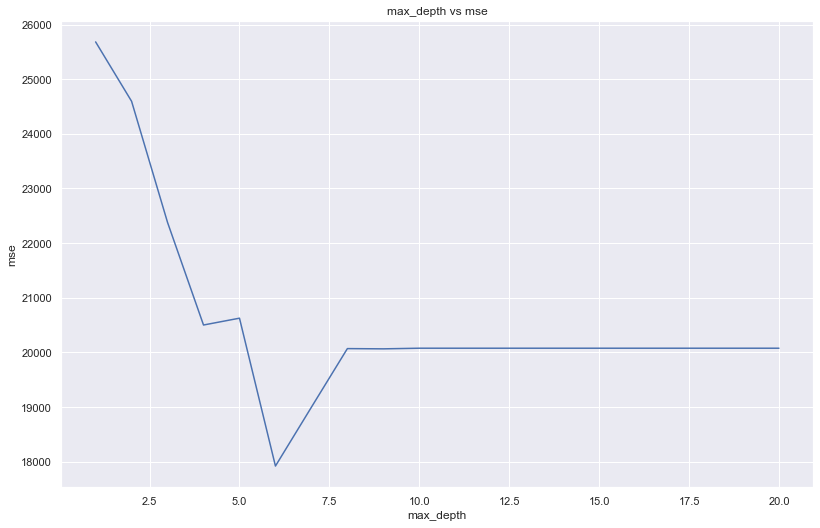

In [21]:
# Celda 5

################################################################  Modelo inicial ###################################################################

# Entrenar modelo con árbol de decision
modelo_1 = DecisionTreeRegressor(max_depth=3, min_samples_split=2)
modelo_1.fit(X, y)

# Realizar predicciones en el conjunto de datos
y_pred_1 = modelo_1.predict(X)

# Calcular métrica de desempeño (Error Cuadrático Medio)
mse_1 = mean_squared_error(y, y_pred_1)
print("Error Cuadrático Medio modelo 1 con todos los datos:", mse_1)
print("")
print("")

################################################################  Mejorando el modelo  ###################################################################

print("################  Mejorando el modelo #####################")
print("")
print("")

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = list(range(1, 21))


# Crear una lista para almacenar los valores de MSE para cada valor de max_depth
mse_scores = []

# Iterar por cada valor de max_depth y calcular el MSE promedio mediante validación cruzada
for depth in max_depth_range:
    modelo = DecisionTreeRegressor(max_depth=depth, min_samples_split=2)
    scores = -1 * cross_val_score(modelo, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores.append(np.mean(scores))

# Encontrar el valor de max_depth que minimiza el MSE promedio
best_depth = max_depth_range[mse_scores.index(min(mse_scores))]

# Imprimir el valor de max_depth que minimiza el MSE promedio
print("El mejor valor de max_depth es:", best_depth)
print("")
print("Gráfica max_depth versus mse") 
plt.title('max_depth vs mse')
plt.plot(max_depth_range, mse_scores)
plt.xlabel('max_depth')
plt.ylabel('mse')
plt.show()


Se observa que el max_depth=6 presenta el mse mas bajo, por ello se ajusta un árbol usando este valor

In [22]:
model_2 = DecisionTreeRegressor(max_depth=6, random_state=1)
model_2.fit(X, y)

# Realizar predicciones en el conjunto de datos
y_pred_2 = model_2.predict(X)

# Calcular métrica de desempeño (Error Cuadrático Medio)
mse_2 = mean_squared_error(y, y_pred_2)
print("Error Cuadrático Medio modelo 2 con todos los datos: ", mse_2)

Error Cuadrático Medio modelo 2 con todos los datos:  13134.848831148256


Ahora se compara el mse del modelo de regresión lineal calculado en el punto 3 y el obtenido en este punto.

In [23]:
print("Error Cuadrático Medio modelo punto 3: ", mse_3_lr)

Error Cuadrático Medio modelo punto 3:  25480.694694371625


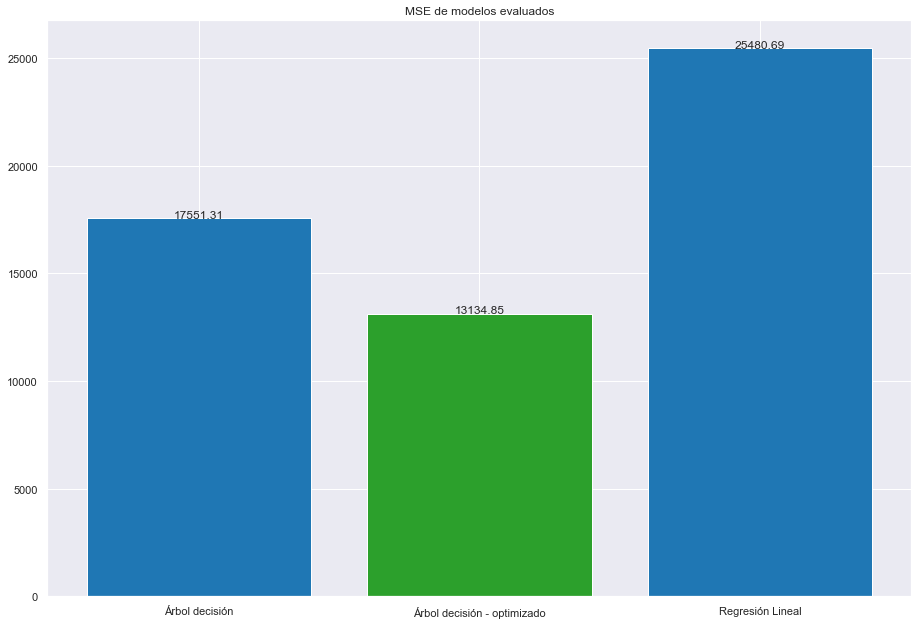

In [24]:
colors = ['tab:blue', 'tab:green', 'tab:blue', 'tab:blue']

# Gráfica de barras
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("MSE de modelos evaluados")
ejeX = ['Árbol decisión', 'Árbol decisión - optimizado', 'Regresión Lineal']
ejeY = [mse_1, mse_2, mse_3_lr]
ax.bar(ejeX, ejeY, color=colors)

# Formato etiquetas
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i, y[i]+0.005, str(round(y[i], 2)), ha='center')
addlabels(ejeX, ejeY, plt)

plt.show()

Se puede observar que el MSE del modelo en este punto (Punto 5) tiene un mejor desempeño que el estimado en el punto 3 ya que el error cuadrático medio es la mitad en el caso del árbol de decisión frente al de la regresión lineal. Esto se explica porque se ajusta más a la naturaleza de los datos, diferente en la regresión lineal que supone una relación lineal.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [25]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,http://mashable.com/2013/08/03/twerking-addict...,523.0,10.0,660.0,0.493884,1.0,0.633971,20.0,4.0,1.0,...,0.050000,0.50,-0.258730,-0.80,-0.100000,0.1,0.0,0.4,0.0,0
5996,http://mashable.com/2014/08/21/study-programs-...,139.0,9.0,144.0,0.647887,1.0,0.739583,15.0,4.0,10.0,...,0.100000,0.60,-0.250000,-0.30,-0.200000,0.0,0.0,0.5,0.0,1
5997,http://mashable.com/2013/04/25/email-warrant-m...,623.0,8.0,536.0,0.512287,1.0,0.647929,6.0,2.0,1.0,...,0.100000,0.40,-0.156250,-0.30,-0.100000,0.0,0.0,0.5,0.0,0
5998,http://mashable.com/2013/06/03/smartphone-sale...,584.0,10.0,266.0,0.534413,1.0,0.605882,9.0,6.0,1.0,...,0.100000,0.60,-0.250000,-0.40,-0.100000,0.0,0.0,0.5,0.0,0


In [26]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [27]:
# Revisión de datos vacíos variable X
X.isnull().sum()

timedelta                        0
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_s

In [28]:
# Revisión de datos vacíos variable y
y.isnull().sum()

0

No se encuentran datos nulos en el set de datos

Estadísticas importantes de las variables

In [29]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,6000.0,358.138833,210.734614,9.000000,175.000000,345.000000,544.250000,731.000000
n_tokens_title,6000.0,10.368667,2.106140,3.000000,9.000000,10.000000,12.000000,19.000000
n_tokens_content,6000.0,547.428833,510.232776,0.000000,231.000000,391.000000,719.000000,8474.000000
n_unique_tokens,6000.0,0.527732,0.148356,0.000000,0.465950,0.541477,0.614980,0.967742
n_non_stop_words,6000.0,0.961333,0.192815,0.000000,1.000000,1.000000,1.000000,1.000000
n_non_stop_unique_tokens,6000.0,0.665823,0.167740,0.000000,0.619624,0.689119,0.756237,1.000000
num_hrefs,6000.0,11.874000,13.444103,0.000000,4.000000,8.000000,15.000000,304.000000
num_self_hrefs,6000.0,3.272500,4.262895,0.000000,1.000000,2.000000,4.000000,116.000000
num_imgs,6000.0,4.954667,8.635916,0.000000,1.000000,1.000000,7.000000,111.000000
num_videos,6000.0,1.463167,4.508144,0.000000,0.000000,0.000000,1.000000,91.000000


In [30]:
y.describe()

count    6000.000000
mean        0.500000
std         0.500042
min         0.000000
25%         0.000000
50%         0.500000
75%         1.000000
max         1.000000
Name: Popular, dtype: float64

In [31]:
# Se revisa el tipo de variables
X.dtypes

timedelta                        float64
n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max                       float64
kw_min_avg      

In [32]:
# Se revisa el tipo de variables
y.dtypes

dtype('int64')

In [33]:
# Se revisa el balanceo de los datos
y.value_counts()

1    3000
0    3000
Name: Popular, dtype: int64

**Descripción de los datos:**

* Hay 6,000 artículos en el conjunto de datos.
* El tiempo medio entre la publicación del artículo y el momento en que se recopilaron los datos es de 358.14 días, con una desviación estándar de 210.73 días.
* El título medio de los artículos contiene 10.37 palabras, con una desviación estándar de 2.11 palabras.
* El contenido medio de los artículos contiene 547.43 palabras, con una desviación estándar de 510.23 palabras.
* El promedio de tokens únicos (palabras distintas) en cada artículo es 0.53, con una desviación estándar de 0.15.
* Los artículos contienen un promedio de 11.87 enlaces a otras páginas, con una desviación estándar de 13.44.
* Los artículos contienen en promedio 3.27 enlaces a otras páginas del mismo sitio web, con una desviación estándar de 4.26.
* Los artículos contienen en promedio 4.95 imágenes, con una desviación estándar de 8.64.
* Los artículos contienen en promedio 1.46 videos, con una desviación estándar de 4.51.
* El promedio de longitud de los tokens (palabras) en los artículos es de 4.50, con una desviación estándar de 0.95.
* Los artículos contienen un promedio de 7.31 palabras clave, con una desviación estándar de 1.88.
* El porcentaje de artículos de estilo de vida es del 5.82%, de entretenimiento es del 16.95%, de negocios es del 13%, de redes sociales es del 6.93%, de tecnología es del 18.43%, y de noticias mundiales es del 17.65%.
* El valor mínimo de "kw_min_min" es -1, y el valor máximo es 294.
* El valor mínimo de "kw_max_min" es 0, y el valor máximo es 82000.
* El valor mínimo de "kw_avg_min" es -1, y el valor máximo es 15674.6.
* El valor mínimo de "kw_min_max" es 0, y el valor máximo es 843300.
* El valor mínimo de "kw_max_max" es 0, y el valor máximo es 843300.
* El valor mínimo de "kw_avg_max" es 0, y el valor máximo es 843300.
* El valor mínimo de "kw_min_avg" es -1, y el valor máximo es 3613.04.
* El valor mínimo de "kw_max_avg" es 0, y el valor máximo es 29802.76.

En general, estos datos sugieren que los artículos en el sitio web varían significativamente en términos de longitud, contenido y características de la audiencia a la que se dirigen. Los artículos también difieren en términos de la cantidad de enlaces externos e internos, imágenes y videos que contienen. Además, los valores de "kw_min_min", "kw_max_min", "kw_avg_min", "kw_min_max", "kw_max_max", "kw_avg_max", "kw_min_avg" y "kw_max_avg" sug

In [34]:
# División de la muestra en set de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [35]:
# Dentro de las variables hay escalas muy diferentes por ello se realiza el procedimiento de escalado.
# Los árboles no son muy perjudicados por este hecho pero la regresión logística si.

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler = StandardScaler()
cols = X.columns
# Estandarizar las columnas seleccionadas
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.fit_transform(X_test[cols])


### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

Se plantean los modelos iniciales

In [36]:
# Celda 6

# definir árbol de decisión y ajustar parámetros
dt_1 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_1.fit(X_train, y_train)

# definir regresión logística y ajustar parámetros
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# hacer predicciones en el conjunto de prueba y calcular métricas
y_pred_dt_1 = dt_1.predict(X_test)
accuracy_dt_1 = accuracy_score(y_test, y_pred_dt_1)
f1_dt_1 = f1_score(y_test, y_pred_dt_1)

# hacer predicciones en el conjunto de prueba y calcular métricas
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Árbol de decisión - Accuracy:", accuracy_dt_1)
print("Árbol de decisión - F1-Score:", f1_dt_1)

print("Regresión logística - Accuracy:", accuracy_lr)
print("Regresión logística - F1-Score:", f1_lr)


Árbol de decisión - Accuracy: 0.6326666666666667
Árbol de decisión - F1-Score: 0.5671641791044776
Regresión logística - Accuracy: 0.6433333333333333
Regresión logística - F1-Score: 0.6358066712049012


Ahora se calibra el modelo para escoger el mejor max_depth_range para la creación del árbol

Text(0, 0.5, 'Accuracy')

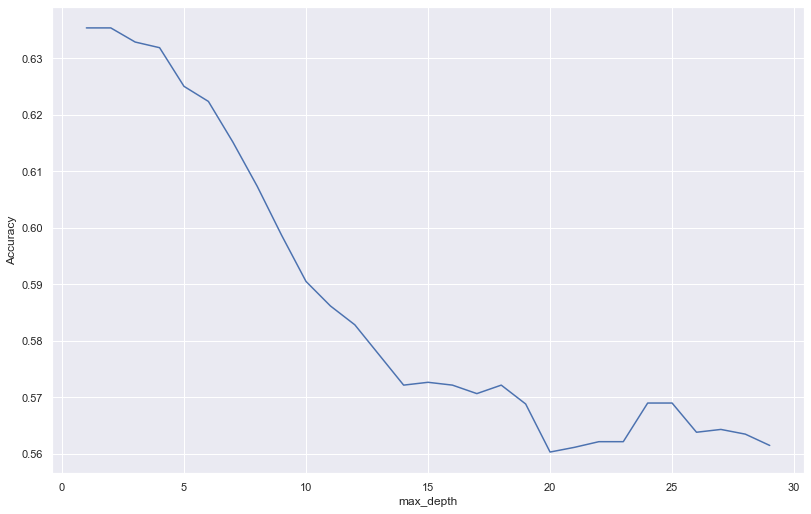

In [37]:
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 30)

# Lista para guardar los valores del accuracy para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())


# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [38]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6353333333333333, 2)

Ahora se crea el árbol con max_depth_range = 2

In [39]:
# definir árbol de decisión y ajustar parámetros
dt_2 = DecisionTreeClassifier(max_depth=2, random_state=42)
dt_2.fit(X_train, y_train)

# hacer predicciones en el conjunto de prueba y calcular métricas
y_pred_dt_2 = dt_2.predict(X_test)
accuracy_dt_2 = accuracy_score(y_test, y_pred_dt_2)
f1_dt_2 = f1_score(y_test, y_pred_dt_2)


In [40]:
print("Árbol de decisión - Accuracy:", accuracy_dt_2)
print("Árbol de decisión - F1-Score:", f1_dt_2)


Árbol de decisión - Accuracy: 0.6453333333333333
Árbol de decisión - F1-Score: 0.6448598130841121


El árbol mejoró :
* Accuracy: 0.6326 a 0.6453
* F1 Score: 0.5671 a 0.6448

Como última mejora, se revisan la importancia de cada una de las variables para el algoritmo, con la importancia se procede a estimar un nuevo árbol para ver su desempeño

In [41]:
# Uso de la función .feature_importances_ para obtener la importancia de cada variable
feature_cols = X.columns
pd.DataFrame({'feature':feature_cols, 'importance':dt_2.feature_importances_}).sort_values('importance')

,feature,importance
0,timedelta,0.000000
31,weekday_is_tuesday,0.000000
32,weekday_is_wednesday,0.000000
33,weekday_is_thursday,0.000000
34,weekday_is_friday,0.000000
35,weekday_is_saturday,0.000000
36,weekday_is_sunday,0.000000
37,is_weekend,0.000000
38,LDA_00,0.000000
39,LDA_01,0.000000


Como se puede ver, las variables kw_max_avg y kw_avg_avg resultan ser las mas importantes, con estas variables se construye el modelo y se evalúa su desempeño:

In [42]:
# definir árbol de decisión y ajustar parámetros
dt_3 = DecisionTreeClassifier(max_depth=2, random_state=42)
dt_3.fit(X_train[['self_reference_avg_sharess', 'kw_avg_avg']], y_train)


# hacer predicciones en el conjunto de prueba y calcular métricas
y_pred_dt_3 = dt_3.predict(X_test[['self_reference_avg_sharess', 'kw_avg_avg']])
accuracy_dt_3 = accuracy_score(y_test, y_pred_dt_3)
f1_dt_3 = f1_score(y_test, y_pred_dt_3)

print("Árbol de decisión - Accuracy:", accuracy_dt_3)
print("Árbol de decisión - F1-Score:", f1_dt_3)

Árbol de decisión - Accuracy: 0.6453333333333333
Árbol de decisión - F1-Score: 0.6448598130841121


Este ultimo modelo presenta el mismo desempeño que el modelo anterior, pero sin el número significativo de variables que inicialmente era de 59 y en este caso sólo se seleccionaron 2. Otro aspecto a resaltar es que el modelo de regresión logistica es levemente inferior a este modelo de arbol de decisión ajustado, claro teniendo en cuenta el escalado de las variables:

|Modelo                |  Accuracy | F1 Score  |
|----------------------|-----------|-----------|
| Regresión Logística  | 0.6433    | 0.6358    |
| Arbol de decisión    | 0.6453    | 0.6448    |


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [43]:
# División de la muestra en set de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [44]:
# Definir los modelos
tree_model1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=100, random_state=42)
tree_model2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=10), n_estimators=100, random_state=42)
logistic_model = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, random_state=42)

# Ajustar los modelos
tree_model1.fit(X_train, y_train)
tree_model2.fit(X_train, y_train)
logistic_model.fit(X_train, y_train)

# Evaluar los modelos en el conjunto de validación
tree_model1_val_pred = tree_model1.predict(X_test)
tree_model2_val_pred = tree_model2.predict(X_test)
logistic_model_val_pred = logistic_model.predict(X_test)

print("Arbol 1:")
print("Accuracy:", accuracy_score(y_test, tree_model1_val_pred))
print("F1-Score:", f1_score(y_test, tree_model1_val_pred))

print("\nÁrbol 2:")
print("Accuracy:", accuracy_score(y_test, tree_model2_val_pred))
print("F1-Score:", f1_score(y_test, tree_model2_val_pred))

print("\nLRegresión Logística:")
print("Accuracy:", accuracy_score(y_test, logistic_model_val_pred))
print("F1-Score:", f1_score(y_test, logistic_model_val_pred))

Arbol 1:
Accuracy: 0.6573333333333333
F1-Score: 0.6573333333333333

Árbol 2:
Accuracy: 0.656
F1-Score: 0.6596306068601584

LRegresión Logística:
Accuracy: 0.6186666666666667
F1-Score: 0.61455525606469


In [45]:
# Crear el ensamble de modelos, en este caso se utiliza VotingClassifier es una clase de Scikit-learn que 
# permite combinar varios modelos en un ensemble utilizando la estrategia de votación.

ensamble = VotingClassifier(estimators=[('tree1', tree_model1), ('tree2', tree_model2), ('logistic', logistic_model)], voting='hard')

# La clase VotingClassifier también tiene un parámetro "voting" que indica la estrategia de votación a utilizar: 
# "hard" para votación dura (la clase más común es la clase ganadora - Clase mayoritaria) o "soft" para votación suave (las probabilidades 
# predichas se promedian y la clase con mayor probabilidad es la ganadora).

# Ajustar el ensemble
ensamble.fit(X_train, y_train)

# Evaluar el ensemble en el conjunto de prueba
ensamble_test_pred = ensamble.predict(X_test)

print("\nModelo Ensamblado:")
print("Accuracy:", accuracy_score(y_test, ensamble_test_pred))
print("F1-Score:", f1_score(y_test, ensamble_test_pred))


Modelo Ensamblado:
Accuracy: 0.66
F1-Score: 0.6613545816733067


Cuando se revisa el desemepeño del modelo ensamblado es mejor que el de todos los modelos por individual en cuando a Accuraccy (0.66) y F1-Score (0.6613)

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [46]:
# División de la muestra en set de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [47]:
# Celda 8

# Crear modelos de árboles de decisión y regresión logística
tree_models1 = [BaggingClassifier(DecisionTreeClassifier(max_depth=i), n_estimators=3, random_state=42) for i in range(1, 11)]
tree_models2 = [BaggingClassifier(DecisionTreeClassifier(min_samples_leaf=i), n_estimators=3, random_state=42) for i in range(1, 11)]
logistic_models = [BaggingClassifier(LogisticRegression(random_state=42), n_estimators=3, random_state=42) for _ in range(10)]


# Entrenar modelos individuales
for model in tree_models1 + tree_models2 + logistic_models:
    model.fit(X_train, y_train)


# Evaluar modelos individuales en conjunto de validación
tree1_scores = [accuracy_score(y_test, model.predict(X_test)) for model in tree_models1]
tree1_f1_scores = [f1_score(y_test, model.predict(X_test), average='weighted') for model in tree_models1]
print("Media del accuracy - Árbol 1: ",np.mean(tree1_scores))
print("Media del F1_Score - Árbol 1: ",np.mean(tree1_f1_scores))
print("")

tree2_scores = [accuracy_score(y_test, model.predict(X_test)) for model in tree_models2]
tree2_f1_scores = [f1_score(y_test, model.predict(X_test), average='weighted') for model in tree_models2]
print("Media del accuracy - Árbol 2: ",np.mean(tree2_scores))
print("Media del F1_Score - Árbol 3: ",np.mean(tree2_f1_scores))
print("")

logistic_scores = [accuracy_score(y_test, model.predict(X_test)) for model in logistic_models]
logistic_f1_scores = [f1_score(y_test, model.predict(X_test), average='weighted') for model in logistic_models]
print("Media del accuracy - Regresión Logística: ",np.mean(logistic_scores))
print("Media del F1_Score - Regresión Logística: ",np.mean(logistic_f1_scores))
print("")


# Calcular los pesos para cada modelo
tree1_weights = np.array(tree1_scores) / np.sum(tree1_scores)
tree2_weights = np.array(tree2_scores) / np.sum(tree2_scores)
logistic_weights = np.array(logistic_scores) / np.sum(logistic_scores)

# Crear ensemble de votación ponderada
estimators = [("tree1_" + str(i), tree_models1[i]) for i in range(len(tree_models1))] + \
             [("tree2_" + str(i), tree_models2[i]) for i in range(len(tree_models2))] + \
             [("logistic_" + str(i), logistic_models[i]) for i in range(len(logistic_models))]

weights = tree1_weights.tolist() + tree2_weights.tolist() + logistic_weights.tolist()


voting_clf = VotingClassifier(estimators=estimators, voting='soft', weights=weights)
#"soft" para votación suave (las probabilidades predichas se promedian y la clase con mayor probabilidad es la ganadora).


# Entrenar ensemble de votación ponderada
voting_clf.fit(X_test, y_test)

# Evaluar ensemble de votación ponderada en conjunto de prueba
y_pred = voting_clf.predict(X_test)
print("Accuracy score del ensamble:", accuracy_score(y_test, y_pred))
print("F1 score del ensemble:", f1_score(y_test, y_pred))


Media del accuracy - Árbol 1:  0.6312
Media del F1_Score - Árbol 1:  0.6311542828234739

Media del accuracy - Árbol 2:  0.6094666666666667
Media del F1_Score - Árbol 3:  0.609393932003093

Media del accuracy - Regresión Logística:  0.614
Media del F1_Score - Regresión Logística:  0.6139304974811839

Accuracy score del ensamble: 0.858
F1 score del ensemble: 0.8644175684277531


Es evidente la mejora significativa que tiene el hecho de realizar el ensamble ponderado. Los desempeños individuales rondan los valores entre 0.60 y 0.63 entre las dos métricas (f1 score y Accuracy), pero cuando se ensamblan su desemepeño aumenta en 0.2.

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

 **Votación Mayoritaria** (tabla 1)

|Modelo                              |  Accuracy | F1 Score  |
|------------------------------------|-----------|-----------|
| Arbol 1                            | 0.6573    | 0.6573    |
| Arbol 2                            | 0.6560    | 0.6596    |
| Regresión Logística                | 0.6186    | 0.6145    |
| Ensamble - Votación Mayoritaria    | 0.6600    | 0.6613    |

**Votación Ponderada** (tabla 2)


|Modelo                              |  Accuracy | F1 Score  |
|------------------------------------|-----------|-----------|
| Arbol 1                            | 0.6312    | 0.6311    |
| Arbol 2                            | 0.6094    | 0.6093    |
| Regresión Logística                | 0.6140    | 0.6139    |
| Ensamble - Votación Mayoritaria    | 0.8580    | 0.8644    |

La ventaja de la votación mayoritaria es que es simple y fácil de implementar, ya que solo requiere contar el número de votos de cada clase y elegir la que tenga más votos. Sin embargo, la desventaja es que no toma en cuenta la certeza de las predicciones y puede ser influenciado por clases desequilibradas en el conjunto de datos. Para este caso, se validó previamente y el set de datos está perfectamente equilibrado lo que da a entender que se pudo haber seleccinado los datos con propósito académico.

Por otro lado, la votación ponderada asigna un peso a cada voto basado en la confianza de la predicción del clasificador. Esto puede mejorar la precisión de la clasificación, pero también puede ser más complejo y requerir más ajustes de hiperparámetros para lograr un buen rendimiento. Además, si los clasificadores base tienen diferentes niveles de precisión, la votación ponderada puede ser menos efectiva que la votación mayoritaria. En este caso puntual, este modelo se beneficia puesto que los modelos individuales tienen métricas muy similares como se evidencia en al tabla 2.

Estos resultados muestran una clara diferencia en la calidad del modelo entre la votación mayoritaria y ponderada. En la votación mayoritaria, el ensamblaje no mejora significativamente la precisión y la puntuación F1 en comparación con los modelos individuales. Sin embargo, en la votación ponderada, el ensamblaje mejora significativamente la precisión y la puntuación F1 en comparación con los modelos individuales. Además, el modelo de ensamblaje en votación ponderada tiene un rendimiento mucho mejor en términos de precisión y puntuación F1 en comparación con la votación mayoritaria, con una precisión del 85.8% y una puntuación F1 del 86.4%. Es importante tener en cuenta que estos resultados pueden variar según la naturaleza del problema y la calidad de los datos utilizados para entrenar los modelos. En general, es importante evaluar la calidad de los modelos utilizando una variedad de métricas y considerar otros factores como el costo de los errores de clasificación y la interpretabilidad del modelo antes de seleccionar un modelo final para la implementación en producción.